<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Создание-таблиц-в-БД-PostgreSQL." data-toc-modified-id="Создание-таблиц-в-БД-PostgreSQL.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Создание таблиц в <code>БД</code> <code>PostgreSQL</code>.</a></span></li><li><span><a href="#Основной-SQL-запрос-с-использованием-рекурсии." data-toc-modified-id="Основной-SQL-запрос-с-использованием-рекурсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Основной <code>SQL</code> запрос с использованием рекурсии.</a></span></li></ul></div>

# Тестовое задание на позицию `Разработчик BI-отчетов`.

In [1]:
# Импорт библиотек
import psycopg2 as ps
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Соединение с БД
conn = ps.connect(host="localhost",
                  port = 5432,
                  database="postgres",
                  user="postgres",
                  password="123",
                  options="-c search_path=public")

# Задание.   

**Есть три таблицы:**   

•	`Товары` (хранит информацию о товарах).

<u>Структура:</u>    
`Код` - int   
`Название` - nvarchar(100)   
`Актуальность` - bit   

•	`Группы` (хранит информацию о товарных группах).   
Каталог товаров, состоящий из групп, имеет древовидную структуру. Поле `ВходитВ` указывает на `Код группы`, в которую он входит. У групп верхнего уровня поле `ВходитВ=0`.

<u>Структура:</u>   
`Код` - int   
`Название` - nvarchar(50)   
`ВходитВ` - int   

•	`Группы_Товары` (хранит информацию о нахождении товара в товарной группе).     
Товар может находится в группе любого уровня вложенности.

<u>Структура:</u>      
`КодГруппы`- int (FK Группы.Код)   
`КодТовара`- int (FK Товары.Код)      

Пример:  
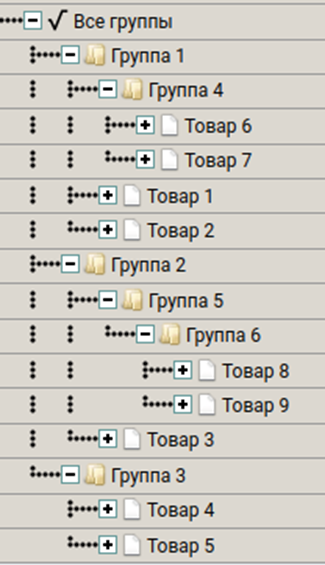


**Задача**: используя рекурсию, написать `SQL запрос`, который вернет список актуальных товаров и групп верхнего уровня, в которые эти товары так или иначе входят.


### Создание таблиц в `БД` `PostgreSQL`.
Данный скрипт нужно запускать в `БД` (например используя `DBeaver`).

In [ ]:
DROP TABLE Товары;
-- Создание таблицы "Товары"
CREATE TABLE Товары (
    Код INT PRIMARY KEY,
    Название VARCHAR(100) NOT NULL,
    Актуальность BIT NOT NULL
);

DROP TABLE Группы CASCADE;
-- Создание таблицы "Группы"
CREATE TABLE Группы (
    Код INT PRIMARY KEY,
    Название VARCHAR(50) NOT NULL,
    ВходитВ INT,
    FOREIGN KEY (ВходитВ) REFERENCES Группы(Код)
);
DROP TABLE Группы_Товары;
-- Создание таблицы "Группы_Товары"
CREATE TABLE Группы_Товары (y
    КодГруппы INT,
    КодТовара INT,
    PRIMARY KEY (КодГруппы, КодТовара),
    FOREIGN KEY (КодГруппы) REFERENCES Группы(Код),
    FOREIGN KEY (КодТовара) REFERENCES Товары(Код)
);

ALTER TABLE Товары ALTER COLUMN Актуальность TYPE integer USING (Актуальность::integer);

-- Заполнение таблицы "Товары"
INSERT INTO Товары (Код, Название, Актуальность)
VALUES
(1, 'Товар 1', 1),
(2, 'Товар 2', 1),
(3, 'Товар 3', 0),
(4, 'Товар 4', 1),
(5, 'Товар 5', 1),
(6, 'Товар 6', 0),
(7, 'Товар 7', 1),
(8, 'Товар 8', 1),
(9, 'Товар 9', 0),
(10, 'Товар 10', 1),
(11, 'Товар 11', 0),
(12, 'Товар 12', 1),
(13, 'Товар 13', 0),
(14, 'Товар 14', 0),
(15, 'Товар 15', 1),
(16, 'Товар 16', 0),
(17, 'Товар 17', 1),
(18, 'Товар 18', 0),
(19, 'Товар 19', 0),
(20, 'Товар 20', 1),
(21, 'Товар 21', 1),
(22, 'Товар 22', 1),
(23, 'Товар 23', 1),
(24, 'Товар 24', 1),
(25, 'Товар 25', 1),
(26, 'Товар 26', 1),
(27, 'Товар 27', 0),
(28, 'Товар 28', 1),
(29, 'Товар 29', 0),
(30, 'Товар 30', 1),
(31, 'Товар 31', 1);

TRUNCATE Группы;
-- Заполнение таблицы "Группы"
INSERT INTO Группы (Код, Название, ВходитВ)
values
(0, 'Группа 0', 0), -- Группа верхнего уровня
(1, 'Группа 1', 0), -- Входит в Группу 0
(2, 'Группа 2', 1), -- Входит в Группу 1
(3, 'Группа 3', 1), -- Входит в Группу 1
(4, 'Группа 4', 0), -- Группа верхнего уровня
(5, 'Группа 5', 4), -- Входит в Группу 4
(6, 'Группа 6', 4), -- Входит в Группу 4
(7, 'Группа 7', 2), -- Входит в Группу 2
(8, 'Группа 8', 2), -- Входит в Группу 2
(9, 'Группа 9', 3), -- Входит в Группу 3
(10, 'Группа 10', 3); -- Входит в Группу 3

-- Заполнение таблицы "Группы_Товары"
INSERT INTO Группы_Товары (КодГруппы, КодТовара)
VALUES
(1, 1), -- Товар 1 в Группе 1
(1, 2), -- Товар 2 в Группе 1
(2, 3), -- Товар 3 в Группе 2
(2, 4), -- Товар 4 в Группе 2
(3, 5), -- Товар 5 в Группе 3
(3, 6), -- Товар 6 в Группе 3
(4, 7), -- Товар 7 в Группе 4
(4, 8), -- Товар 8 в Группе 4
(5, 9), -- Товар 9 в Группе 5
(5, 10), -- Товар 10 в Группе 5
(1, 11), -- Товар 11 в Группе 1
(1, 12), -- Товар 12 в Группе 1
(6, 13), -- Товар 13 в Группе 6
(2, 14), -- Товар 14 в Группе 2
(3, 15), -- Товар 15 в Группе 3
(7, 16), -- Товар 16 в Группе 7
(4, 17), -- Товар 17 в Группе 4
(4, 18), -- Товар 18 в Группе 4
(8, 19), -- Товар 19 в Группе 8
(5, 20), -- Товар 20 в Группе 5
(8, 21), -- Товар 21 в Группе 8
(1, 22), -- Товар 22 в Группе 1
(9, 23), -- Товар 23 в Группе 9
(6, 24), -- Товар 24 в Группе 6
(3, 25), -- Товар 25 в Группе 3
(3, 26), -- Товар 26 в Группе 3
(10, 27), -- Товар 27 в Группе 10
(4, 28), -- Товар 28 в Группе 4
(5, 29), -- Товар 29 в Группе 5
(7, 30), -- Товар 30 в Группе 7
(5, 31) -- Товар 31 в Группе 5
;

### Основной `SQL` запрос с использованием рекурсии.

In [3]:
df = pd.read_sql(''' 

WITH RECURSIVE
RecursiveGroups AS (
-- Базовый случай: выбираем группы верхнего уровня (ВходитВ = 0)
SELECT Код,
       Название,
       Код AS КорневаяГруппа
FROM Группы
WHERE ВходитВ = 0

UNION 

-- Рекурсивный случай: выбираем дочерние группы и связываем их с корневой группой
SELECT g.Код,
       g.Название,
       rg.КорневаяГруппа
FROM Группы AS g
INNER JOIN RecursiveGroups AS rg ON g.ВходитВ = rg.Код
)
-- Выбираем актуальные товары и их корневые группы
SELECT t.Код AS Код_товара,    
       t.Название AS Название_товара,
       MIN(rg.Название) AS Название_группы_товара,
       CONCAT('Группы: ', array_to_string(array_agg(rg.КорневаяГруппа),'; ')) AS Код_группы_верхнего_уровня
FROM Товары AS t
INNER JOIN Группы_Товары AS gt ON t.Код = gt.КодТовара
INNER JOIN RecursiveGroups AS rg ON gt.КодГруппы = rg.Код
WHERE t.Актуальность = 1
GROUP BY t.Код
ORDER BY t.Код
                    
''', con=conn)

df

,Код_товара,Название_товара,Название_группы_товара,Код_группы_верхнего_уровня
0,1,Товар 1,Группа 1,Группы: 1; 0
1,2,Товар 2,Группа 1,Группы: 1; 0
2,4,Товар 4,Группа 2,Группы: 1; 0
3,5,Товар 5,Группа 3,Группы: 1; 0
4,7,Товар 7,Группа 4,Группы: 4; 0
5,8,Товар 8,Группа 4,Группы: 4; 0
6,10,Товар 10,Группа 5,Группы: 4; 0
7,12,Товар 12,Группа 1,Группы: 1; 0
8,15,Товар 15,Группа 3,Группы: 1; 0
9,17,Товар 17,Группа 4,Группы: 4; 0


**Итог:**    
В результате запроса получилась с таблица с актуальными товарами, группами в которые они входят, а также список из групп верхнего уровня. 

В созданной таблице 3 группы верхнего уровня:
 - 0 группа входит сама в себя;
 - 1 и 4 группы входят в группу 0.